In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import pie_chart
import plot_likert

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# mapping of old labels to new one
d11_rename_mapping = {
    'Mostly agile': 'Mostly agile',
    'Balanced between agile and traditional': 'Balanced between agile and traditional',
    'Totally traditional': 'Totally traditional',
    'Mostly traditional': 'Mostly traditional',
    'Totally agile': 'Totally agile',
    "I don't know": "I don't know"
}

In [4]:
ordem = [2, 3, 1, 0, 4]
remove_value(df,'0','D11_Agile_Development')
remove_value(df,'I don\'t know','D11_Agile_Development')
# labels of our pie chart
labels = list(df['D11_Agile_Development'].value_counts().index)
labels = [labels[i] for i in ordem]
print(labels)
# total answers of each label
values = list(df['D11_Agile_Development'].value_counts())
values = [values[i] for i in ordem]
print(values)


['Totally traditional', 'Mostly traditional', 'Balanced between agile and traditional', 'Mostly agile', 'Totally agile']
[41, 29, 77, 89, 23]


In [5]:
# normalize to the sum become 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

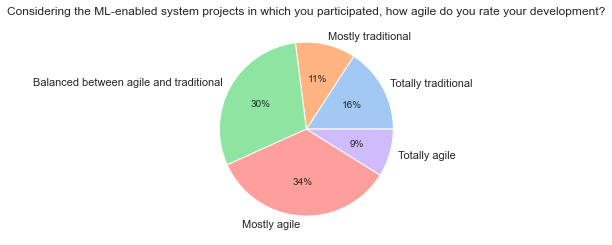

In [6]:
pie_chart(normalized_values, rename_values(d11_rename_mapping, labels), 
          title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?")

In [7]:
labels = set(list(df['D11_Agile_Development']))
print(labels)

{'Totally agile', 'Balanced between agile and traditional', 'Mostly agile', 'Mostly traditional', 'Totally traditional'}


In [8]:
data = pd.DataFrame({'q1':df['D11_Agile_Development']})

In [9]:
data = data[data['q1'] != '0']
data = data[data['q1'] != 'I don\'t know']

In [10]:
print(data)

                                         q1
2                       Totally traditional
3    Balanced between agile and traditional
4    Balanced between agile and traditional
5                             Totally agile
6    Balanced between agile and traditional
..                                      ...
273                     Totally traditional
274                     Totally traditional
275                            Mostly agile
276  Balanced between agile and traditional
277                     Totally traditional

[259 rows x 1 columns]


<AxesSubplot:xlabel='Percentage of Responses'>

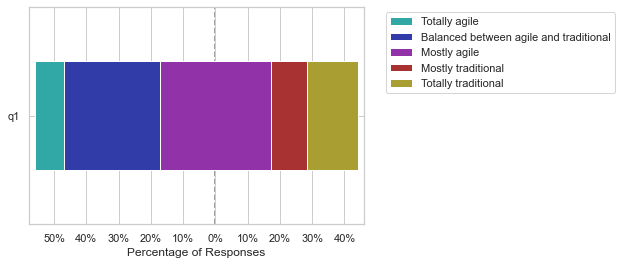

In [14]:
plot_likert.plot_likert(data, labels,plot_percentage=True, colors = ['#32a852', '#32a8a6', '#323ca8', '#9232a8', '#a83232', '#a89e32'])